In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

App Ideas:
- Create new fantasy variable that calculates ESPN fantasy points
- Plot/show 10 players with highest average points, rebs, fantasy points, etc (interactable)
- Look up a player, show best games
- Look up a team?
- Compare two players?

Graph Ideas:
- Team wins line chart
- Each team ppg vs league average
- Assist vs turnover scatterplot (plotly?)
- FPoints vs mins

In [71]:
# Read in the data scraped above
boxdf = pd.read_csv('boxScores.csv')
boxdf.columns


Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
       'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS',
       'FANTASY'],
      dtype='object')

In [72]:
# Create a new df that is the sums of stats
# Create a new df that is the averages per game of stats

# Both of these are one row per player.
totals = boxdf.groupby(['PLAYER_NAME','TEAM_NAME'], as_index = False).sum()
totals['Rank'] = totals['FANTASY'].rank(ascending = False)
totals

,PLAYER_NAME,TEAM_NAME,PLAYER_ID,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY,Rank
0,A.J. Lawson,Minnesota Timberwolves,1630639,1610612750,22200212,2,1,1,1.000,0,...,1,0,0,0,0,1,2,-5,4,440.0
1,AJ Green,Milwaukee Bucks,3262520,3221225498,44400249,17,1,4,0.250,1,...,3,1,1,0,0,2,3,-13,11,418.5
2,AJ Griffin,Atlanta Hawks,17942100,17716740107,244201492,145,30,62,4.712,12,...,19,7,7,0,7,10,75,-2,132,281.0
3,Aaron Gordon,Denver Nuggets,2651116,20937965659,288601304,378,72,125,7.152,11,...,89,33,7,11,16,19,188,70,393,102.5
4,Aaron Holiday,Atlanta Hawks,24434820,24159191055,333001708,280,28,67,5.962,8,...,22,25,11,3,12,26,72,12,172,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Yuta Watanabe,Brooklyn Nets,21178807,20937965763,288601505,231,36,60,6.923,20,...,38,10,3,7,4,14,98,-17,217,212.5
460,Zach Collins,San Antonio Spurs,14655420,14495514831,199800578,158,31,59,4.830,7,...,42,25,6,11,17,27,75,-17,208,219.5
461,Zach LaVine,Chicago Bulls,2446764,19327352892,266401519,398,86,207,4.905,34,...,47,48,13,1,26,27,248,-37,386,108.0
462,Zeke Nnaji,Denver Nuggets,16301920,16106127430,222001180,76,14,22,4.381,1,...,11,1,3,0,4,15,33,-41,56,349.5


In [73]:

means = boxdf.groupby(['PLAYER_NAME', 'TEAM_NAME'], as_index = False).mean()
means

,PLAYER_NAME,TEAM_NAME,PLAYER_ID,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY
0,A.J. Lawson,Minnesota Timberwolves,1630639.0,1.610613e+09,2.220021e+07,2.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-5.000000,4.000000
1,AJ Green,Milwaukee Bucks,1631260.0,1.610613e+09,2.220012e+07,8.500000,0.500000,2.000000,0.250000,0.500000,...,1.000000,1.500000,0.500000,0.500000,0.000000,0.000000,1.000000,1.500000,-6.500000,5.500000
2,AJ Griffin,Atlanta Hawks,1631100.0,1.610613e+09,2.220014e+07,13.181818,2.727273,5.636364,0.428364,1.090909,...,1.000000,1.727273,0.636364,0.636364,0.000000,0.636364,0.909091,6.818182,-0.181818,12.000000
3,Aaron Gordon,Denver Nuggets,203932.0,1.610613e+09,2.220010e+07,29.076923,5.538462,9.615385,0.550154,0.846154,...,4.615385,6.846154,2.538462,0.538462,0.846154,1.230769,1.461538,14.461538,5.384615,30.230769
4,Aaron Holiday,Atlanta Hawks,1628988.0,1.610613e+09,2.220011e+07,18.666667,1.866667,4.466667,0.397467,0.533333,...,1.066667,1.466667,1.666667,0.733333,0.200000,0.800000,1.733333,4.800000,0.800000,11.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Yuta Watanabe,Brooklyn Nets,1629139.0,1.610613e+09,2.220012e+07,17.769231,2.769231,4.615385,0.532538,1.538462,...,2.153846,2.923077,0.769231,0.230769,0.538462,0.307692,1.076923,7.538462,-1.307692,16.692308
460,Zach Collins,San Antonio Spurs,1628380.0,1.610613e+09,2.220006e+07,17.555556,3.444444,6.555556,0.536667,0.777778,...,3.333333,4.666667,2.777778,0.666667,1.222222,1.888889,3.000000,8.333333,-1.888889,23.111111
461,Zach LaVine,Chicago Bulls,203897.0,1.610613e+09,2.220013e+07,33.166667,7.166667,17.250000,0.408750,2.833333,...,3.416667,3.916667,4.000000,1.083333,0.083333,2.166667,2.250000,20.666667,-3.083333,32.166667
462,Zeke Nnaji,Denver Nuggets,1630192.0,1.610613e+09,2.220012e+07,7.600000,1.400000,2.200000,0.547625,0.100000,...,0.400000,1.100000,0.100000,0.300000,0.000000,0.400000,1.500000,3.300000,-4.100000,5.600000


In [74]:
means['MIN'].mean()

19.3436155974125

Text(0.5, 0, 'Total Turnovers')

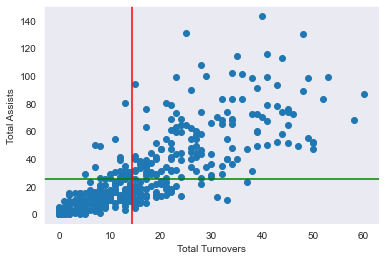

In [75]:
# Scatterplot for assists vs. turnovers
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(totals['TOV'], totals['AST'])
plt.axhline(y = totals['AST'].mean(), color = 'g', label = 'Average Total Turnovers')
plt.axvline(x = totals['TOV'].mean(), color = 'r')
plt.ylabel('Total Assists')
plt.xlabel('Total Turnovers')

# Need to put in a minutes minimum
# For the app:choose which team to filter by

In [93]:
fig = px.scatter(totals, x = 'TOV', y ='AST',
    title = 'Total Assists vs. Total Turnovers',
    hover_data = ['PLAYER_NAME', 'TEAM_NAME'], 
    width = 500, height = 500)
fig.show()
# fig.to_html(full_html = False, include_plotlyjs = 'cdn')

Text(0, 0.5, 'Average points scored')

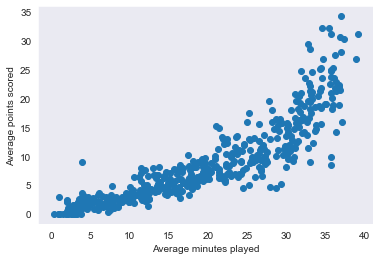

In [77]:
# Scatterplot for points vs. mins (maybe with a minimum minutes threshold)
fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = fig.add_subplot()
ax.scatter(means['MIN'], means['PTS'])
plt.xlabel('Average minutes played')
plt.ylabel('Average points scored')


Things to make dynamic here:
- Category (can be points, rebounds, assists, fantasy points, etc)
- updating category should also update the average bar
- top n players (from like 3 to 25) With a selection bar?
- Counts vs average? or both?

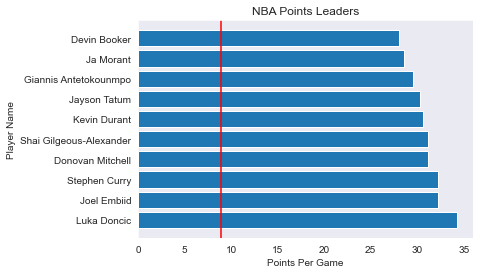

In [78]:
# Top 15 most points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Points Leaders')
plt.xlabel('Points Per Game')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
points = means['PTS'].sort_values(ascending = False).head(10)
ax.barh(means.iloc[points.index]['PLAYER_NAME'], points)
ax.axvline(means['PTS'].mean(), color = 'r')

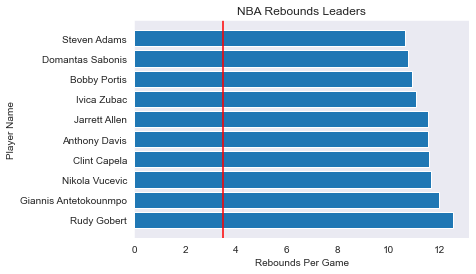

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Rebounds Leaders')
plt.xlabel('Rebounds Per Game')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
rebounds = means['REB'].sort_values(ascending = False).head(10)
ax.barh(means.iloc[rebounds.index]['PLAYER_NAME'], rebounds)
ax.axvline(means['REB'].mean(), color = 'r')

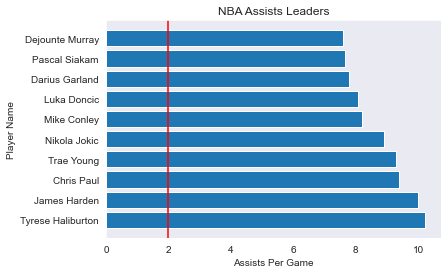

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Assists Leaders')
plt.xlabel('Assists Per Game')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
assists = means['AST'].sort_values(ascending = False).head(10)
ax.barh(means.iloc[assists.index]['PLAYER_NAME'], assists)
ax.axvline(means['AST'].mean(), color = 'r')

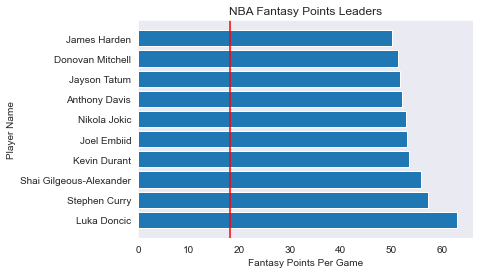

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Fantasy Points Leaders')
plt.xlabel('Fantasy Points Per Game')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
points = means['FANTASY'].sort_values(ascending = False).head(10)
ax.barh(means.iloc[points.index]['PLAYER_NAME'], points)
ax.axvline(means['FANTASY'].mean(), color = 'r')

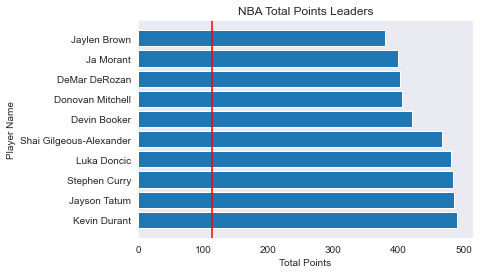

In [79]:
# Top 10 most points total (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Total Points Leaders')
plt.xlabel('Total Points')
plt.ylabel('Player Name')
# Get a list of top 10 total points and the player names
points = totals['PTS'].sort_values(ascending = False).head(10)
ax.barh(totals.iloc[points.index]['PLAYER_NAME'], points)
ax.axvline(totals['PTS'].mean(), color = 'r')

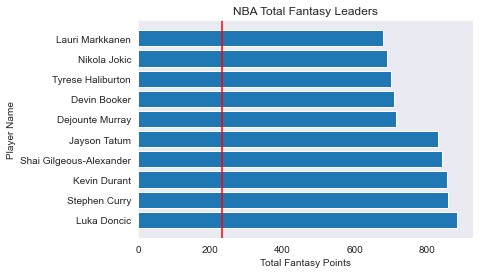

In [87]:
# Top 10 most fantasy points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Total Fantasy Leaders')
plt.xlabel('Total Fantasy Points')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
fpoints = totals['FANTASY'].sort_values(ascending = False).head(10)
ax.barh(totals.iloc[fpoints.index]['PLAYER_NAME'], fpoints)
ax.axvline(totals['FANTASY'].mean(), color = 'r')

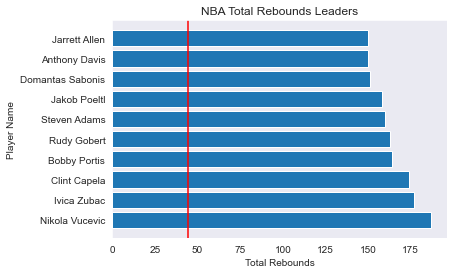

In [90]:
# Top 10 most fantasy points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Total Rebounds Leaders')
plt.xlabel('Total Rebounds')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
rebounds = totals['REB'].sort_values(ascending = False).head(10)
ax.barh(totals.iloc[rebounds.index]['PLAYER_NAME'], rebounds)
ax.axvline(totals['REB'].mean(), color = 'r')

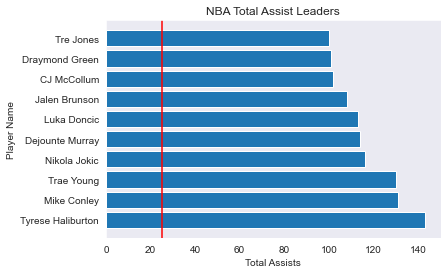

In [91]:
# Top 10 most fantasy points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Total Assist Leaders')
plt.xlabel('Total Assists')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
fpoints = totals['AST'].sort_values(ascending = False).head(10)
ax.barh(totals.iloc[fpoints.index]['PLAYER_NAME'], fpoints)
ax.axvline(totals['AST'].mean(), color = 'r')

In [81]:
means.iloc[points.index]['PLAYER_NAME']

273               Kevin Durant
212               Jayson Tatum
404              Stephen Curry
298                Luka Doncic
400    Shai Gilgeous-Alexander
112               Devin Booker
119           Donovan Mitchell
99               DeMar DeRozan
175                  Ja Morant
209               Jaylen Brown
Name: PLAYER_NAME, dtype: object

Search for a player and compare their stats
- show average mins/game
- show average fantasy points/game
- show their location in boxplot distributions


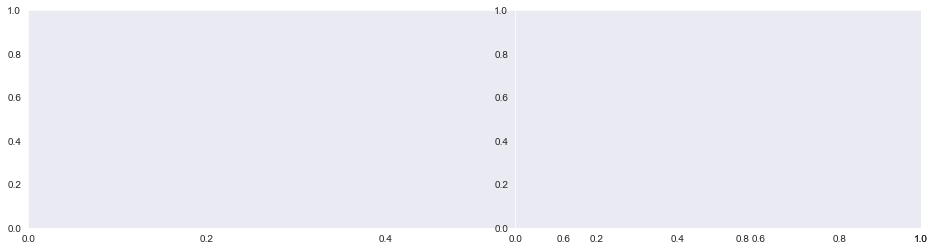

In [82]:
fig = plt.figure(figsize = (16, 4))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(122)
# Top 15 most rebounds average (with league average included)

# Top 15 counts rebounds (with weighted league average included)

In [92]:
means['RATE'] = means['FANTASY'] / means['MIN']
fig = px.scatter(means, x = 'MIN', y ='FANTASY',
    title = 'Average Fantasy Points per Minute',
    hover_data = ['PLAYER_NAME', 'TEAM_NAME', 'RATE'], 
    width = 600, height = 600)
fig.show()
# fig.to_html(full_html = False, include_plotlyjs = 'cdn')